In [ ]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# mount google drive for getting data

from google.colab import drive
drive.mount('/content/gdrive',force_remount = True)


Mounted at /content/gdrive


In [ ]:
# reading cyberbullying_tweets.csv data
df = pd.read_csv("/content/gdrive/MyDrive/FINAL YR PROJECT/Fake News/Model/Data/cyberbullying_tweets.csv")


In [ ]:
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


In [ ]:
df['cyberbullying_type'].value_counts()

religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64

In [ ]:

df['cyberbullying_type'].unique()

array(['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying',
       'age', 'ethnicity'], dtype=object)

<Axes: >

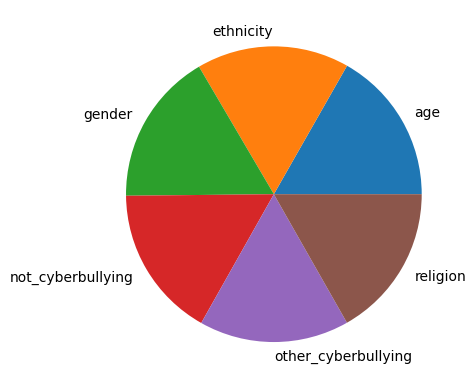

In [ ]:
df.groupby('cyberbullying_type').size().plot(kind='pie')

In [ ]:
# installing tweet-preprocessor library
!pip install tweet-preprocessor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import preprocessor as p
#forming a separate feature for cleaned tweets
def preprocess_tweet(row):
    text = row['tweet_text']
    text = p.clean(text)
    return text

In [ ]:
df['tweet_text'] = df.apply(preprocess_tweet, axis=1)

In [ ]:
# Removing stopwords

from gensim.parsing.preprocessing import remove_stopwords
def stopword_removal(row):
    text = row['tweet_text']
    text = remove_stopwords(text)
    return text

In [ ]:
df['tweet_text'] = df.apply(stopword_removal, axis=1)

In [ ]:
df.head()

,tweet_text,cyberbullying_type
0,"In words , food crapilicious!",not_cyberbullying
1,Why white?,not_cyberbullying
2,classy whore? Or red velvet cupcakes?,not_cyberbullying
3,"meh. thanks heads up, concerned angry dude twi...",not_cyberbullying
4,This ISIS account pretending Kurdish account. ...,not_cyberbullying


In [ ]:
# Converting text into smaller letters.

df['tweet_text'] = df['tweet_text'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')

<ipython-input-15-5eec7875be9c>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['tweet_text'] = df['tweet_text'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')


In [ ]:
df.head()

,tweet_text,cyberbullying_type
0,in words food crapilicious,not_cyberbullying
1,why white,not_cyberbullying
2,classy whore or red velvet cupcakes,not_cyberbullying
3,meh thanks heads up concerned angry dude twitter,not_cyberbullying
4,this isis account pretending kurdish account l...,not_cyberbullying


In [ ]:
# Shuffling Data
from sklearn.utils import shuffle
df = shuffle(df)
df = df.reset_index(drop=True)
df

,tweet_text,cyberbullying_type
0,charges dropped couldve lying he beat cause g...,gender
1,cant wait till daddy gets custody i deadass st...,ethnicity
2,woah nah you re amazing favorite people twitte...,other_cyberbullying
3,oh god lets that thursday friday home girl xx,not_cyberbullying
4,my book girl bullied high school she falls lov...,age
...,...,...
47687,yall usin autism gay insult yall makin rape jo...,gender
47688,i hate niggas try talk i don t wanting y all ...,ethnicity
47689,all means eyes work better crap obviously thos...,other_cyberbullying
47690,fuck drew brees fuckin dumb nigger,ethnicity


In [ ]:
# seperating text and labels

texts = df['tweet_text']
labels = df['cyberbullying_type']

In [ ]:
max_words = 0
for words in texts:
  max_words = len(words)

max_words


69

In [ ]:
# assigning values to lables

labels = labels.map({'not_cyberbullying': 0, 'gender': 1,'religion': 2,'other_cyberbullying': 3,'age': 4,'ethnicity': 5})

In [ ]:
labels = pd.get_dummies(labels)

In [ ]:
labels

,0,1,2,3,4,5
0,0,1,0,0,0,0
1,0,0,0,0,0,1
2,0,0,0,1,0,0
3,1,0,0,0,0,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
47687,0,1,0,0,0,0
47688,0,0,0,0,0,1
47689,0,0,0,1,0,0
47690,0,0,0,0,0,1


In [ ]:
labels.shape

(47692, 6)

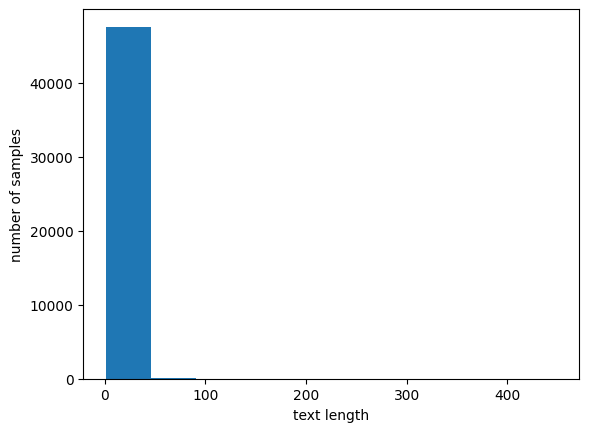

In [ ]:
# plot the distribution of article lengths in terms of word counts
text_lengths = texts.apply(lambda x: len(x.split(" ")))
plt.hist(text_lengths)
plt.xlabel('text length')
plt.ylabel('number of samples')
plt.show()

In [ ]:
MAX_SEQUENCE_LENGTH = 700
MAX_NUM_WORDS = 1000
EMBEDDING_DIM = 64
TEST_SPLIT = 0.2

In [ ]:
!pip install keras_preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.6 MB/s eta 0:00:00


In [ ]:
# vectorizing text samples into a 2D integer tensor 

from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences


# tokenizing sentences into words 
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)

# using fit_on_texts method assigning values to particular words
tokenizer.fit_on_texts(texts)

# texts_to_sequences method is used to give particular integer values to word
sequences = tokenizer.texts_to_sequences(texts)

# calculating word_index
word_index = tokenizer.word_index
num_words = min(MAX_NUM_WORDS, len(word_index)) + 1
print("Num of words",num_words)
# padding data to the same length for each samples
data = pad_sequences(sequences, 
                     maxlen=MAX_SEQUENCE_LENGTH, 
                     padding='pre', 
                     truncating='pre')

# printing number of tokens and shape of data as well labels value
print('Found %s unique tokens.' % len(word_index))
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Num of words 1001
Found 38778 unique tokens.
Shape of data tensor: (47692, 700)
Shape of label tensor: (47692, 6)


In [ ]:
# spliting the data into training set, validation set, and testing set.   

from sklearn.model_selection import train_test_split


# splitting data into training set as 70%, validation set 10% and testing set as 20%.

# calling train_test_split method to get testing values first. Where arguments for that function will be data as input values and labels as target values.
x_rem,x_test,y_rem,y_test = train_test_split(data,
                                             labels,
                                             test_size = 0.2)

# After getting remaining values spliting that data into training set and validation set.
x_train, x_val, y_train, y_val = train_test_split(x_rem, 
                                                  y_rem, 
                                                  test_size=0.1)

In [ ]:
x_train.shape

(34337, 700)

In [ ]:
x_val.shape

(3816, 700)

In [ ]:
x_test.shape

(9539, 700)

In [ ]:
vocab_size =  len(tokenizer.word_index) + 1

In [ ]:
vocab_size

38779

In [ ]:
import keras
from keras.layers.reshaping.flatten import Flatten
from keras.layers.pooling.max_pooling1d import MaxPool1D
from keras.models import Sequential, Model
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, multiply, Permute, Lambda
from keras import backend as K

# Defining the model architecture
# part 1: word and sequence processing
model = Sequential()
# defining embedding layer where embedding dimension/ vector size is defined as 64 and input length is set as 700. Where num_words are unique words.
model.add(Embedding(input_dim = len(word_index),
                         output_dim = EMBEDDING_DIM, 
                         input_length=MAX_SEQUENCE_LENGTH))
# for defining convolutional layer, number of filters are set as 32 and kernal size is defined as 1 X 5.
model.add(Conv1D(filters=32, kernel_size=5, activation='relu'))
# maxpooling1d layer is used to take maximum values from representation.
model.add(MaxPool1D(2))
# dropout value is 0.4
model.add(Dropout(rate=0.4))


# creating second convolutional layer with kernal size 1 X 3, and number of filters will be 16. Where activation function will remain same as ReLU.
model.add(Conv1D(filters=16, kernel_size=3, activation='relu'))
# creating maxpooling layer with 2 neurons so that will compare with neighbour neuron and will take max value and also setting strides value as 2.
model.add(MaxPool1D(2, strides=2))

# adding one more convolutional layer with kernal size 1 X 3, and number of filters will be 8 and setting strides value as 2. Where activation function will be ReLU.
model.add(Conv1D(filters=8, kernel_size=3, activation='relu', strides= 2))
# adding flatten layer
model.add(Flatten())


# adding dense layer with 512 neurons
model.add(Dense(units=512, activation='relu'))
# dropout value is 0.5.
model.add(Dropout(rate=0.5))


# # Adding attention mechanism to the model
attention_probs = Dense(512, activation='softmax', name='attention_probs')(model.layers[-1].output)
attention_mul = multiply([model.layers[-1].output, attention_probs], name='attention_mul')
output_attention = Lambda(lambda x: K.sum(x, axis=1), name='output_attention')(attention_mul)

# output layer contains 6 values because this is multiclass classification problem.
# Where activation function is 'softmax' because it will calculate probability of each nuerons individually and whichever nueron has highest probability value that will be selected. 
        
model.add(Dense(units=6, activation='softmax'))

# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 700, 64)           2481792   
                                                                 
 conv1d (Conv1D)             (None, 696, 32)           10272     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 348, 32)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 348, 32)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 346, 16)           1552      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 173, 16)          0         
 1D)                                                    

In [ ]:
!pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


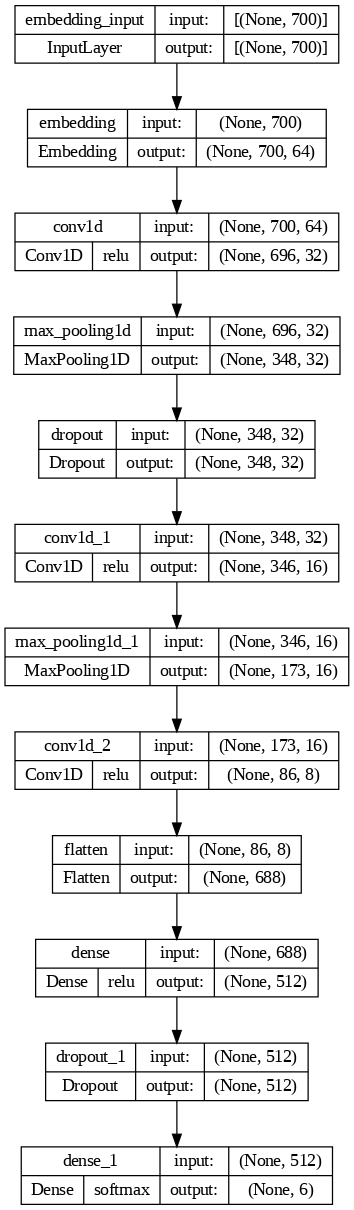

In [ ]:
# visulizing model summary
import tensorflow as tf

tf.keras.utils.plot_model(
model,
to_file="model.png",
show_shapes=True,
show_dtype=False,
show_layer_names=True,
rankdir="TB",
expand_nested=True,
dpi=90,
layer_range=None,
show_layer_activations=True,
)

In [ ]:
# installing keras_flops for calculating Floating Point per Second of model.
!pip install keras_flops
import keras_flops

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tensorflow.python.framework.convert_to_constants import convert_variables_to_constants_v2_as_graph

In [ ]:
# defining get_flops function.
def get_flops(model, batch_size=None):
    if batch_size is None:
        batch_size = 1

    real_model = tf.function(model).get_concrete_function(tf.TensorSpec([batch_size] + model.inputs[0].shape[1:], model.inputs[0].dtype))
    frozen_func, graph_def = convert_variables_to_constants_v2_as_graph(real_model)

    run_meta = tf.compat.v1.RunMetadata()
    opts = tf.compat.v1.prNofiler.ProfileOptionBuilder.float_operation()
    flops = tf.compat.v1.profiler.profile(graph=frozen_func.graph,
                                            run_meta=run_meta, cmd='op', options=opts)
    return flops.total_float_ops

In [ ]:
# early stopping incase there is no improvement.

from tensorflow import keras
from keras.callbacks import EarlyStopping


In [ ]:
# monitoring validation accuracy, setting up patience level to see whether there is improvment or not.

custom_early_stopping = EarlyStopping(
    monitor='val_accuracy', 
    patience=12, 
    min_delta=0.001, 
    mode='max'
)

In [ ]:
# training the model
import time as t
start = t.time()


# fitting data to model where batch size is defined as 128 and epochs set as 15. Also validating model with 10% validation values of dataset.
history = model.fit(x_train, 
                    y_train,
                    batch_size=128,
                    epochs=15,
                    validation_data=(x_val, y_val))
                    # callbacks= custom_early_stopping)
                    
# calculating total training time.
print("total training time:",t.time()-start)

Epoch 1/15
269/269 [==============================] - 45s 104ms/step - loss: 1.1834 - accuracy: 0.4928 - val_loss: 0.7449 - val_accuracy: 0.7178
Epoch 2/15
269/269 [==============================] - 7s 25ms/step - loss: 0.6151 - accuracy: 0.7400 - val_loss: 0.5095 - val_accuracy: 0.7678
Epoch 3/15
269/269 [==============================] - 5s 19ms/step - loss: 0.5182 - accuracy: 0.7631 - val_loss: 0.4861 - val_accuracy: 0.7720
Epoch 4/15
269/269 [==============================] - 5s 18ms/step - loss: 0.4906 - accuracy: 0.7739 - val_loss: 0.4816 - val_accuracy: 0.7880
Epoch 5/15
269/269 [==============================] - 4s 15ms/step - loss: 0.4737 - accuracy: 0.7830 - val_loss: 0.4805 - val_accuracy: 0.7744
Epoch 6/15
269/269 [==============================] - 4s 13ms/step - loss: 0.4574 - accuracy: 0.7857 - val_loss: 0.4762 - val_accuracy: 0.7757
Epoch 7/15
269/269 [==============================] - 4s 13ms/step - loss: 0.4412 - accuracy: 0.7960 - val_loss: 0.4721 - val_accuracy: 0.78

In [ ]:

from keras_flops import get_flops
flops = get_flops(model, batch_size=128)
print(flops)
print(f"FLOPS: {flops / 10 ** 9:.03} G")


Instructions for updating:
This API was designed for TensorFlow v1. See https://www.tensorflow.org/guide/migrate for instructions on how to migrate your code to TensorFlow v2.


2067270144
FLOPS: 2.07 G


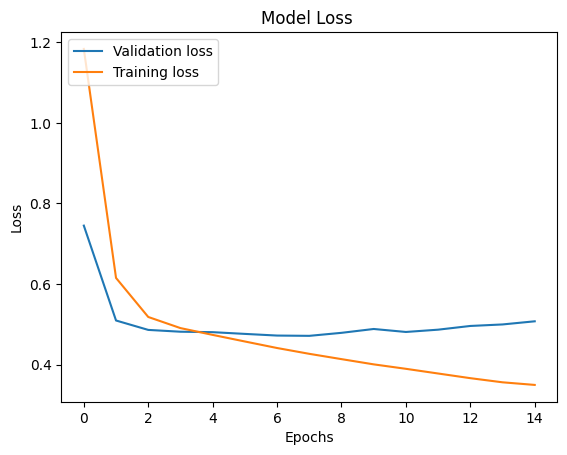

In [ ]:
# Plot training & validation accuracy values

plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('Model Loss ')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Validation loss', 'Training loss'], loc='upper left')
plt.show()

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

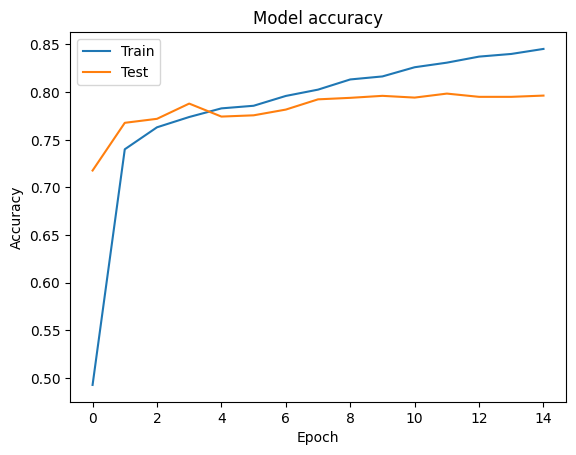

In [ ]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


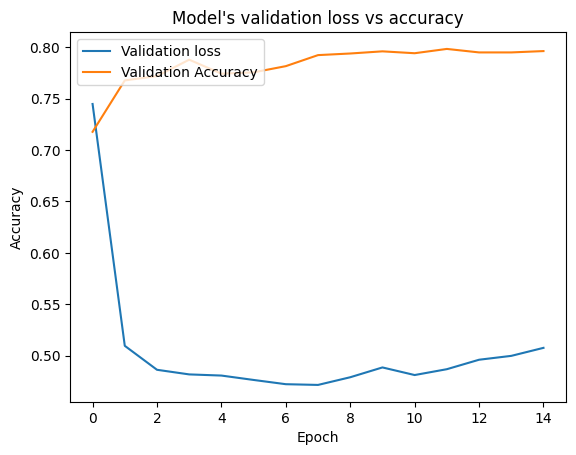

In [ ]:

# Plot training & validation accuracy values
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_accuracy'])

plt.title("Model's validation loss vs accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Validation loss','Validation Accuracy'], loc='upper left')
plt.show()

In [ ]:
# define a function that allows us to evaluate models

from sklearn.metrics import accuracy_score

def evaluate_model(predict_fun, X_train, y_train, X_test, y_test):
    '''
    evaluate the model, both training and testing accuraries are reported
    '''
    # training acc
    y_predict_train = predict_fun(X_train)
    train_acc = accuracy_score(y_train,y_predict_train)
    
    return train_acc

In [ ]:
# evaluating model

start = t.time()
train_acc= evaluate_model(lambda x: np.rint(model.predict(x)),
                                     x_train, 
                                     y_train, 
                                     x_test, 
                                     y_test)
print("Training Accuracy: {:.2f}%".format(train_acc*100))

1074/1074 [==============================] - 4s 3ms/step
Training Accuracy: 84.50%


In [ ]:
# testing accuracy using evaluate function and reporting time required for testing.

import time as t
start_time = t.time()
print("Evaluate on test data")
history1 = model.evaluate(x_test, y_test)
print("test loss, test acc:", history1)
print("Total time required for testing",t.time()-start_time)

Evaluate on test data
299/299 [==============================] - 2s 7ms/step - loss: 0.5258 - accuracy: 0.7955
test loss, test acc: [0.5257684588432312, 0.7954712510108948]
Total time required for testing 2.8415024280548096


In [ ]:
# saving model.
from tensorflow import keras
model.save('/content/gdrive/MyDrive/FINAL YR PROJECT/Fake News/Model/Data/attn cnn cyberbullying')